In [ ]:
"""
The following notebook explores usage of LSTM to predict stock value.
The data is obtained from Yahoo Finance API and read usinf yfinance library.
Walmart stock is used in this notebook for prediction purposes.
Different libraries like Matplotlib, Numpy, Pandas, Scikit Learn have been used.
Mean Squared Error of 6.1404e-04 has been obtained while training.
Real and predicted stock prices are plotted for visual comparision.
"""

In [145]:
"""
yfinance is a python library which helps us access Yahoo Historical stocks data
"""
pip install yfinance

In [130]:
#Importing yf and matplotlib

import yfinance as yf
import matplotlib.pyplot as plt


In [131]:
# Reading Walmart Stock historical data
pfizer = yf.Ticker('wmt')

In [18]:
#Taking the data over 10 year timeline
history  =  pfizer.history(start="2011-08-12",  end="2021-08-12")

In [19]:
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-08-12,39.687051,39.853407,39.037483,39.409798,15160400,0.0,0
2011-08-15,39.512781,39.671213,39.045408,39.591995,14829700,0.0,0
2011-08-16,40.748538,41.572382,40.495048,41.128773,25595500,0.0,0
2011-08-17,40.970350,41.334742,40.526741,40.835682,15513400,0.0,0
2011-08-18,40.011840,41.152548,39.853411,41.025803,25045700,0.0,0
...,...,...,...,...,...,...,...
2021-08-05,143.701183,145.006378,143.462073,144.956573,9001800,0.0,0
2021-08-06,145.673943,145.932984,144.418553,144.697525,6420200,0.0,0
2021-08-09,145.375041,145.942944,144.866901,145.046249,5270600,0.0,0


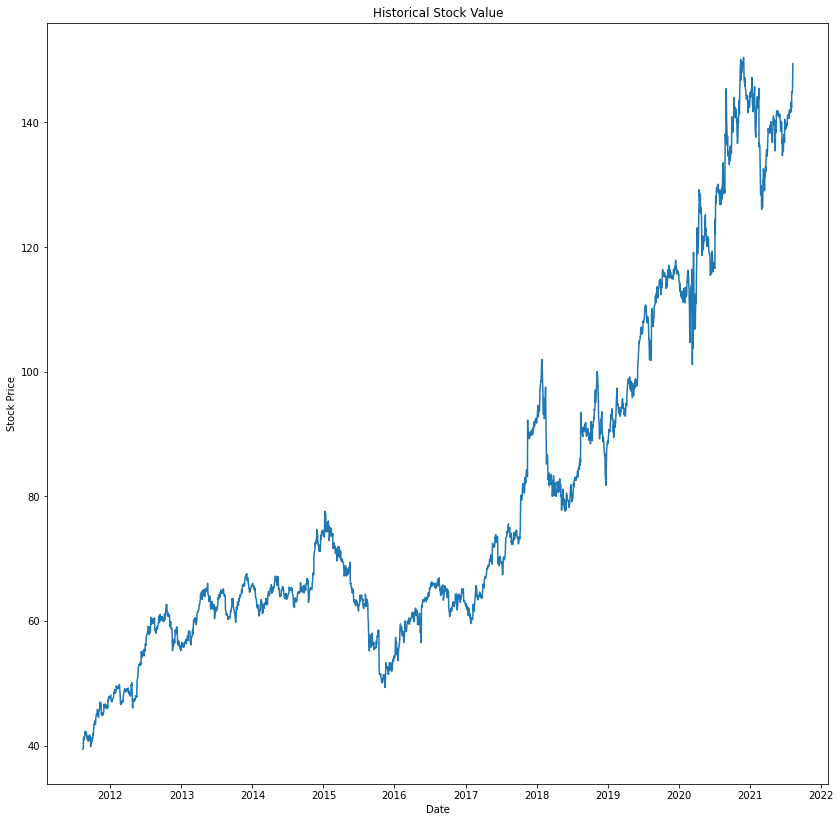

In [20]:
#Plotting the closing data of each day over the timeline

plt.figure(figsize=(14,14))
plt.plot(history['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [21]:
#Importing necessary libraries 

import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [22]:
#Splitting data into train and test. The first 2000 days is for training
#The rest of the days are for test
train = history.iloc[:2000,3:4].values
test = history.iloc[2000:,3:4].values

In [132]:
#Scaling the feature for better convergence. 
"""
Dividing training set into X and Y by training on 50 days of data
Predicting on the next day and then update the weights accordingly
"""
x_train = []
y_train = []
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(train)
for i in range(50,2000):
  x_train.append(scaled_train[i-50:i,0])
  y_train.append(scaled_train[i,0])
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train.shape

(1950,)

In [123]:
"""
Declaring an LSTM model with optimizer Adam and Mean Squared Error loss
Used dropouts to prevent overfitting and introduce regularization
"""

model = Sequential()
#Adding LSTM layers with some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 100,batch_size = 32)


Epoch 1/100
61/61 [==============================] - 6s 16ms/step - loss: 0.0391
Epoch 2/100
61/61 [==============================] - 1s 16ms/step - loss: 0.0040
Epoch 3/100
61/61 [==============================] - 1s 16ms/step - loss: 0.0036
Epoch 4/100
61/61 [==============================] - 1s 16ms/step - loss: 0.0028
Epoch 5/100
61/61 [==============================] - 1s 16ms/step - loss: 0.0030
Epoch 6/100
61/61 [==============================] - 1s 16ms/step - loss: 0.0024
Epoch 7/100
61/61 [==============================] - 1s 16ms/step - loss: 0.0024
Epoch 8/100
61/61 [==============================] - 1s 16ms/step - loss: 0.0026
Epoch 9/100
61/61 [==============================] - 1s 16ms/step - loss: 0.0024
Epoch 10/100
61/61 [==============================] - 1s 16ms/step - loss: 0.0022
Epoch 11/100
61/61 [==============================] - 1s 15ms/step - loss: 0.0021
Epoch 12/100
61/61 [==============================] - 1s 15ms/step - loss: 0.0021
Epoch 13/100
61/61 [=====

In [124]:
"""
The test set needs previous 50 values before the start of test set to start predicting
So the train and test are combined first and the data 50 points before test set is also taken
for prediction purposes. The test set is also scaled.
"""


temp_train = history.iloc[:2000,3:4]
temp_test = history.iloc[2000:,3:4]
combined = pd.concat((temp_train,temp_test),axis = 0)
temp = combined[len(combined) - len(temp_test)-50:].values
temp = temp.reshape(-1,1)
temp = scaler.transform(temp)
x_test = []
for i in range(50,566):
  x_test.append(temp[i-50:i,0])
x_test = np.asarray(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [125]:
x_test.shape

(516, 50, 1)

In [126]:
#The prediction of model on test set
predicted_dnn = model.predict(x_test)
predicted_dnn.shape

(516, 1)

In [127]:
#The predicted values are scaled back to original values
predicted_dnn = scaler.inverse_transform(predicted_dnn)

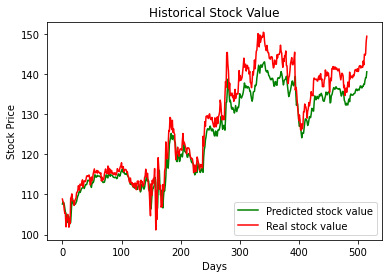

In [147]:
"""
Both the real stock price and predicted price are illustrated using the plot.
"""

plt.plot(predicted_dnn,color = 'green')
plt.plot(test,color = 'red')
plt.legend(["Predicted stock value", "Real stock value "], loc ="lower right")
plt.title('Historical Stock Value')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show()